In [1]:
import PV_ICE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'ElectricFutures')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_DEMICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)



Your simulation will be stored in C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures


In [2]:
PV_ICE.__version__

'v0.2.0+66.gd0a175b.dirty'

In [3]:
MATERIALS = ['WAMBACH']
MATERIAL = MATERIALS[0]

MODULEBASELINE = r'C:\Users\Silvana\Documents\GitHub\PRIVATE_Wambach_US_INSTALLS_2020.csv'
#MODULEBASELINE = r'\..\..\PRIVATE_Wambach_US_INSTALLS_2020.csv'

## All EL to compare to Wambach Results Tab

In [4]:
r1 = PV_ICE.Simulation(name='PV_ICE', path=testfolder)
r1.createScenario(name='base', file=MODULEBASELINE)
r1.scenario['base'].addMaterials(MATERIALS, r'..\..\baselines')
r1.scenMod_IRENIFY('base', ELorRL = 'EL' )

r1b = PV_ICE.Simulation(name='PV_ICE', path=testfolder)
r1b.createScenario(name='base', file=MODULEBASELINE)
r1b.scenario['base'].addMaterials(MATERIALS, r'..\..\baselines')
r1b.scenMod_IRENIFY('base', ELorRL = 'EL' )
r1c = PV_ICE.Simulation(name='PV_ICE', path=testfolder)
r1c.createScenario(name='base', file=MODULEBASELINE)
r1c.scenario['base'].addMaterials(MATERIALS, r'..\..\baselines')
r1c.scenMod_IRENIFY('base', ELorRL = 'EL' )


path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures
Using Irena Early Loss Assumptions
path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures
Using Irena Early Loss Assumptions
path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures
Using Irena Early Loss Assumptions


In [5]:
# Testing the New CDF functions
r1.calculateMassFlow(m1=True, m2=False, m3=False)
r1b.calculateMassFlow(m2=True, m1=False, m3=False)
r1c.calculateMassFlow(m3=True, m1=False, m2=False)

Working on Scenario:  base
********************
Warning, this is for special debuging of Wambach Procedure.Make sure to use Wambach Module
Finished Area+Power Generation Calculations
==> Working on Material :  WAMBACH
Working on Scenario:  base
********************
Warning, this is for special debuging of Wambach Procedure.Make sure to use Wambach Module
Finished Area+Power Generation Calculations
==> Working on Material :  WAMBACH
Working on Scenario:  base
********************
Warning, this is for special debuging of Wambach Procedure.Make sure to use Wambach Module
Finished Area+Power Generation Calculations
==> Working on Material :  WAMBACH


In [6]:
pvice_Usyearly1, pvice_Uscum1 = r1.aggregateResults()
pvice_Usyearly1b, pvice_Uscum1b = r1b.aggregateResults()
pvice_Usyearly1c, pvice_Uscum1c = r1c.aggregateResults()

# Correcting for conversion to Metric Tonnes as this is already on Metric Tonnes for Wambach Input
pvice_Usyearly1 *= 1000000
pvice_Uscum1 *= 1000000
pvice_Usyearly1b *= 1000000
pvice_Uscum1b *= 1000000
pvice_Usyearly1c *= 1000000
pvice_Uscum1c *= 1000000

## Important Check for Gen 1 Plot

c:\users\silvana\documents\github\circulareconomy-massflowcalculator\PV_ICE\main.py:1130: RuntimeWarning: divide by zero encountered in true_divide
  return (alpha/np.array(x)) * ((np.array(x)/beta)**alpha) * (np.exp(-(np.array(x)/beta)**alpha))
c:\users\silvana\documents\github\circulareconomy-massflowcalculator\PV_ICE\main.py:1130: RuntimeWarning: invalid value encountered in double_scalars
  return (alpha/np.array(x)) * ((np.array(x)/beta)**alpha) * (np.exp(-(np.array(x)/beta)**alpha))


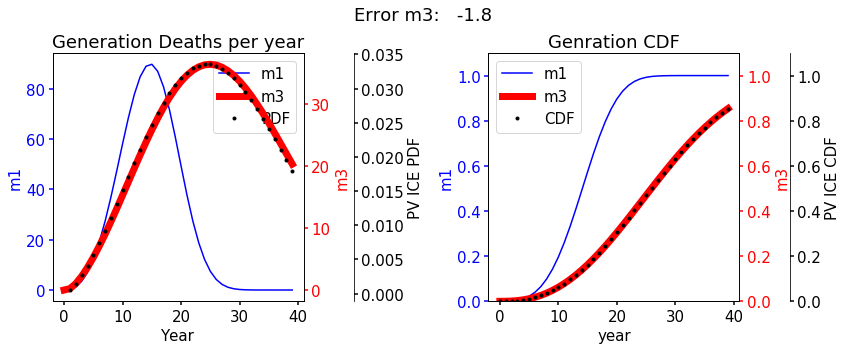

In [7]:
# IMPORTANT PLOT
expectedval = 1116586
errorm3 = (pvice_Uscum1c['WasteAll_WAMBACH_PV_ICE_base_[Tonnes]'].iloc[-1]-expectedval)*100/expectedval

foo = r1.scenario['base'].data.loc[0,'EOL_on_Year_0':'EOL_on_Year_39'].values
foo1b = r1b.scenario['base'].data.loc[0,'EOL_on_Year_0':'EOL_on_Year_39'].values
foo1c = r1c.scenario['base'].data.loc[0,'EOL_on_Year_0':'EOL_on_Year_39'].values

genmass = r1.scenario['base'].data.loc[0,'Mass_[MetricTonnes]']
foo2 = r1.scenario['base'].data.loc[0,'EOL_on_Year_0':'EOL_on_Year_39'].values.cumsum()/genmass
foo1b2 = r1b.scenario['base'].data.loc[0,'EOL_on_Year_0':'EOL_on_Year_39'].values.cumsum()/genmass
foo1c2 = r1c.scenario['base'].data.loc[0,'EOL_on_Year_0':'EOL_on_Year_39'].values.cumsum()/genmass

cdfcheck = PV_ICE.main.weibull_cdf_vis(2.4928, 30, xlim=40)
pdfcheck = PV_ICE.main.weibull_pdf_vis(2.4928, 30, xlim=40)

plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (12, 5)

fig, (ax, ax2) =  plt.subplots(1,2)
fig.suptitle('Error m3:   '+str(round(errorm3,1)))
fig.subplots_adjust(right=0.75)

twin1 = ax.twinx()
twin2 = ax.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin2.spines['right'].set_position(("axes", 1.2))

p1, = ax.plot(foo, "b-", label="m1")
p2, = twin1.plot(foo1c, "r", label="m3", linewidth=7)
p3, = twin2.plot(pdfcheck, 'k.', label='PDF')


#ax.set_xlim(0, 2)
#ax.set_ylim(0, 2)
#twin1.set_ylim(0, 4)
#twin2.set_ylim(1, 65)

ax.set_xlabel("Year")
ax.set_ylabel("m1")
ax.set_title('Generation Deaths per year')
twin1.set_ylabel("m3")
twin2.set_ylabel("PV ICE PDF")

ax.yaxis.label.set_color(p1.get_color())
twin1.yaxis.label.set_color(p2.get_color())
twin2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
ax.tick_params(axis='x', **tkw)

ax.legend(handles=[p1, p2, p3])


### PLOT 2

twin12 = ax2.twinx()
twin22 = ax2.twinx()

# Offset the right spine of twin2.  The ticks and label have already been
# placed on the right by twinx above.
twin22.spines['right'].set_position(("axes", 1.2))

p12, = ax2.plot(foo2, "b-", label="m1")
p22, = twin12.plot(foo1c2, "r-", label="m3", linewidth=7)
p32, = twin22.plot(cdfcheck, 'k.', label='CDF')


#ax.set_xlim(0, 2)
#ax.set_ylim(0, 2)
#twin1.set_ylim(0, 4)
#twin2.set_ylim(0, 1)
ax2.set_ylim(0,1.1)
twin12.set_ylim(0, 1.1)
twin22.set_ylim(0, 1.1)

ax2.set_xlabel("year")
ax2.set_title('Genration CDF')
ax2.set_ylabel("m1")
twin12.set_ylabel("m3")
twin22.set_ylabel("PV ICE CDF")

ax2.yaxis.label.set_color(p12.get_color())
twin12.yaxis.label.set_color(p22.get_color())
twin22.yaxis.label.set_color(p32.get_color())

tkw2 = dict(size=4, width=1.5)
ax2.tick_params(axis='y', colors=p12.get_color(), **tkw2)
twin12.tick_params(axis='y', colors=p22.get_color(), **tkw2)
twin22.tick_params(axis='y', colors=p32.get_color(), **tkw2)
ax2.tick_params(axis='x', **tkw)

ax2.legend(handles=[p12, p22, p32])


fig.tight_layout() 
fig.subplots_adjust(top=0.85)

plt.show()

# R1: EL
# R2: RL
# R3: PV ICE

In [12]:
sim = PV_ICE.Simulation(name='PV_ICE', path=testfolder)
sim.createScenario(name='IrenaEL', file=MODULEBASELINE)
sim.createScenario(name='IrenaRL', file=MODULEBASELINE)
sim.createScenario(name='base', file=MODULEBASELINE)
sim.scenario['IrenaEL'].addMaterials(MATERIALS, r'..\..\baselines')
sim.scenMod_IRENIFY('IrenaEL', ELorRL = 'EL' )
sim.scenario['IrenaRL'].addMaterials(MATERIALS, r'..\..\baselines')
sim.scenMod_IRENIFY('IrenaRL', ELorRL = 'RL' )
sim.scenario['base'].addMaterials(MATERIALS, r'..\..\baselines')

sim.calculateMassFlow(m3=True)

pvice_Usyearly1, pvice_Uscum1 = sim.aggregateResults()

pvice_Usyearly1 *= 1000000
pvice_Uscum1 *= 1000000

pvice_Uscum1.to_csv('pvice_USCum_WAMBACH.csv')
pvice_Usyearly1.to_csv('pvice_USYearly_WAMBACH.csv')


path = C:\Users\Silvana\Documents\GitHub\CircularEconomy-MassFlowCalculator\PV_ICE\TEMP\ElectricFutures
Using Irena Early Loss Assumptions
Using Irena Regular Loss Assumptions
Working on Scenario:  IrenaEL
********************
Warning, this is for special debuging of Wambach Procedure.Make sure to use Wambach Module
Finished Area+Power Generation Calculations
==> Working on Material :  WAMBACH
Working on Scenario:  IrenaRL
********************
Warning, this is for special debuging of Wambach Procedure.Make sure to use Wambach Module
Finished Area+Power Generation Calculations
==> Working on Material :  WAMBACH
Working on Scenario:  base
********************
Warning, this is for special debuging of Wambach Procedure.Make sure to use Wambach Module
Finished Area+Power Generation Calculations
==> Working on Material :  WAMBACH


In [13]:
sim.plotMetricResults()

["PV', 'ICE', 'IrenaEL", "PV', 'ICE', 'IrenaRL", "PV', 'ICE', 'base"]


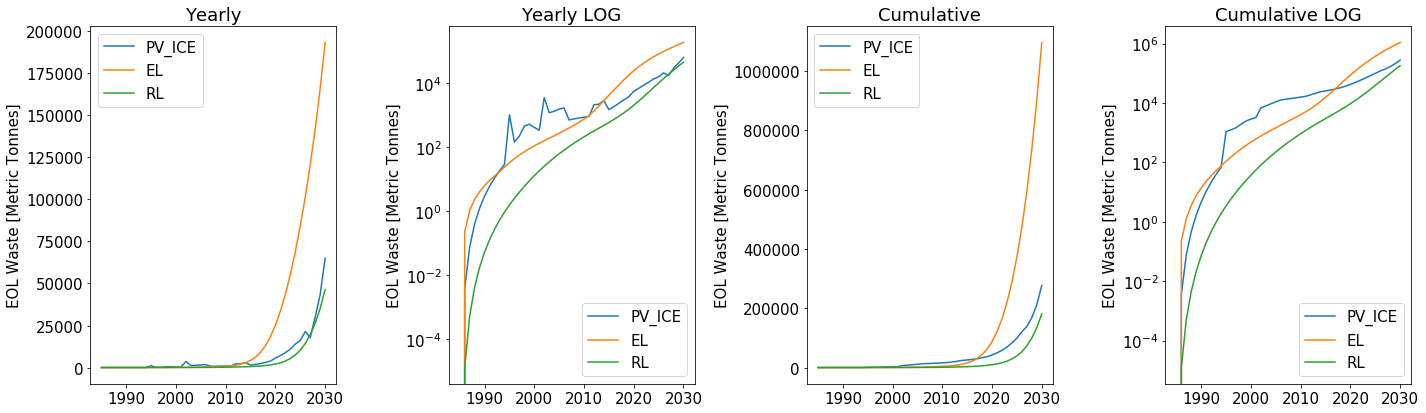

In [14]:
plt.rcParams.update({'font.size': 15})
plt.rcParams['figure.figsize'] = (12, 5)

fig, (a0,a1,a2,a3) = plt.subplots(1,4, figsize=(20, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .2, wspace=.4)

a0.plot(pvice_Usyearly1['WasteEOL_WAMBACH_PV_ICE_base_[Tonnes]'], label='PV_ICE')
a0.plot(pvice_Usyearly1['WasteEOL_WAMBACH_PV_ICE_IrenaEL_[Tonnes]'], label='EL')
a0.plot(pvice_Usyearly1['WasteEOL_WAMBACH_PV_ICE_IrenaRL_[Tonnes]'], label='RL')
a0.legend()
#a0.set_yscale('log')
a0.set_title('Yearly')
a0.set_ylabel('EOL Waste [Metric Tonnes]')

a1.plot(pvice_Usyearly1['WasteEOL_WAMBACH_PV_ICE_base_[Tonnes]'], label='PV_ICE')
a1.plot(pvice_Usyearly1['WasteEOL_WAMBACH_PV_ICE_IrenaEL_[Tonnes]'], label='EL')
a1.plot(pvice_Usyearly1['WasteEOL_WAMBACH_PV_ICE_IrenaRL_[Tonnes]'], label='RL')
a1.legend()
a1.set_yscale('log')
a1.set_title('Yearly LOG')
a1.set_ylabel('EOL Waste [Metric Tonnes]')


a2.plot(pvice_Uscum1['WasteEOL_WAMBACH_PV_ICE_base_[Tonnes]'], label='PV_ICE')
a2.plot(pvice_Uscum1['WasteEOL_WAMBACH_PV_ICE_IrenaEL_[Tonnes]'], label='EL')
a2.plot(pvice_Uscum1['WasteEOL_WAMBACH_PV_ICE_IrenaRL_[Tonnes]'], label='RL')
a2.legend()
a2.set_title('Cumulative')
a2.set_ylabel('EOL Waste [Metric Tonnes]')


a3.plot(pvice_Uscum1['WasteEOL_WAMBACH_PV_ICE_base_[Tonnes]'], label='PV_ICE')
a3.plot(pvice_Uscum1['WasteEOL_WAMBACH_PV_ICE_IrenaEL_[Tonnes]'], label='EL')
a3.plot(pvice_Uscum1['WasteEOL_WAMBACH_PV_ICE_IrenaRL_[Tonnes]'], label='RL')
a3.legend()
a3.set_title('Cumulative LOG')
a3.set_yscale('log')
a3.set_ylabel('EOL Waste [Metric Tonnes]')

fig.tight_layout() 


Text(0.5, 1.0, 'CDF and PDF PV ICE Calc')

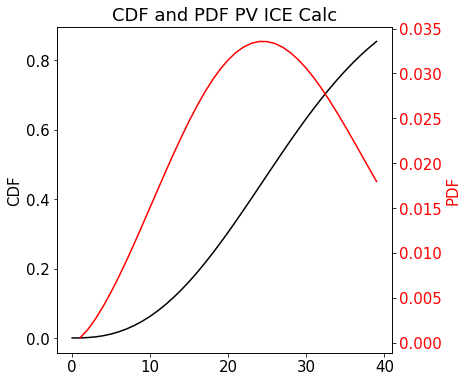

In [15]:
fig = plt.figure(1, figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(PV_ICE.main.weibull_cdf_vis(2.4928, 30, xlim=40), 'k')
ax.set_ylabel('CDF')
ax2 = ax.twinx()
ax2.plot(PV_ICE.main.weibull_pdf_vis(2.4928, 30, xlim=40), color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.set_ylabel('PDF', color='r')
plt.title('CDF and PDF PV ICE Calc')